In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

import plotly.graph_objects as go
import plotly.express as px
from scipy import stats
import numpy as np



In [2]:
print("Loading dataset from online source...")
df = sns.load_dataset('tips')

Loading dataset from online source...


In [3]:
print("\n--- DATA PREVIEW ---")
display(df.head())
display(df.tail())


--- DATA PREVIEW ---


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [4]:
print("\n--- DATASET INFO ---")
print(df.info())


--- DATASET INFO ---
<class 'pandas.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB
None


## 1.A Measures of Central Tendency
Central tendency identifies the "central" or most representative value within a dataset. The three most common measures are **Mean**, **Median**, and **Mode**.

### **Mean ($\bar{x}$)**
The arithmetic average, calculated by summing all observations and dividing by the total count.
* **Formula:** $$\bar{x} = \frac{\sum_{i=1}^{n} x_i}{n}$$
* **Characteristic:** Highly sensitive to **outliers**, which can pull the mean away from the true center.

### **Median**
The middle value in a dataset when the observations are arranged in ascending or descending order.
* **Calculation:**
    * If $n$ is **odd**: The median is the value at position $\frac{n+1}{2}$.
    * If $n$ is **even**: The median is the average of the two middle values at positions $\frac{n}{2}$ and $\frac{n}{2} + 1$.
* **Characteristic:** **Robust** against outliers; it represents the 50th percentile.

### **Mode**
The value that appears with the highest frequency in a dataset.

## 1.B Understanding Modality
Modality refers to the number of distinct "peaks" (local maxima) observed in the distribution of data. This helps identify if a dataset contains sub-groups.

### **I. Unimodal (Single Peak)**
The distribution has one clear highest point where most values cluster.
* **Visual:** Resembles a single "mound" or a standard Bell Curve.
* **Example:** **Adult Heights.** Most individuals cluster around a specific average, with fewer people being extremely short or extremely tall.

### **II. Bimodal (Two Peaks)**
The distribution exhibits two distinct peaks, often indicating that the dataset is a mixture of two different populations.
* **Visual:** Resembles a "camel’s back" with two humps.
* **Example:** **Physics Exam Scores.** In a difficult test, you might see one peak around **85%** (those who mastered the material) and another around **40%** (those who struggled).

### **III. Multimodal (Three or More Peaks)**
The distribution has three or more significant peaks.
* **Visual:** A complex series of "waves" or humps.
* **Example:** **Restaurant Traffic.** A diner may see customer peaks at **8:00 AM** (Breakfast), **12:00 PM** (Lunch), and **7:00 PM** (Dinner).

### **IV. No Mode (Uniform Distribution)**
No single value stands out as more frequent than the others.
* **Visual:** A flat, rectangular shape.

In [5]:
#Central Tendency
bill = df['total_bill']

print("\n--- CENTRAL TENDENCY (Total Bill) ---")
print(f"Mean (Average):     ${bill.mean():.2f}")
print(f"Median (Middle):    ${bill.median():.2f}")
print(f"Mode (Most Freq):   ${bill.mode()[0]:.2f}")


--- CENTRAL TENDENCY (Total Bill) ---
Mean (Average):     $19.79
Median (Middle):    $17.80
Mode (Most Freq):   $13.42


In [6]:
# Interactive Visualization: Central Tendency
mean_val = df['total_bill'].mean()
median_val = df['total_bill'].median()
mode_val = df['total_bill'].mode()[0]

fig = go.Figure()
fig.add_trace(go.Histogram(x=df['total_bill'], name='Total Bill', opacity=0.7, marker_color='skyblue'))
fig.add_vline(x=mean_val, line_width=3, line_dash="dash", line_color="red", annotation_text=f"Mean: {mean_val:.2f}", annotation_position="top right")
fig.add_vline(x=median_val, line_width=3, line_dash="dash", line_color="green", annotation_text=f"Median: {median_val:.2f}", annotation_position="top left")
fig.add_vline(x=mode_val, line_width=3, line_dash="dash", line_color="blue", annotation_text=f"Mode: {mode_val:.2f}", annotation_position="bottom right")
fig.update_layout(title="Central Tendency: Mean vs Median vs Mode", xaxis_title="Total Bill", yaxis_title="Count")
fig.show()



## 2. Measures of Dispersion (Spread)
Dispersion measures how spread out the data is around the center.

### **Range**
The difference between the maximum and minimum values.
$$R = x_{max} - x_{min}$$

### **Variance ($s^2$)**
The average of the squared differences from the Mean. It measures how far each number in the set is from the mean.
$$s^2 = \frac{\sum (x_i - \bar{x})^2}{n - 1}$$
*(Note: We use $n-1$ for sample variance to correct for bias)*

### **Standard Deviation ($s$)**
The square root of the variance. It is in the same units as the original data.
$$s = \sqrt{s^2}$$

### **Interquartile Range (IQR)**
The range of the middle 50% of the data. It is the difference between the 75th percentile ($Q3$) and the 25th percentile ($Q1$).
$$IQR = Q3 - Q1$$



In [7]:
#spread
print("\n--- DISPERSION (Total Bill) ---")
print(f"Range (Max - Min):  ${(bill.max() - bill.min()):.2f}")
print(f"Variance:           {bill.var():.2f}")
print(f"Std Deviation:      {bill.std():.2f}")

Q1 = bill.quantile(0.25)
Q3 = bill.quantile(0.75)
IQR = Q3 - Q1
print(f"IQR (Q3 - Q1):      {IQR:.2f}")


--- DISPERSION (Total Bill) ---
Range (Max - Min):  $47.74
Variance:           79.25
Std Deviation:      8.90
IQR (Q3 - Q1):      10.78


In [8]:
# Interactive Visualization: Dispersion (Box Plot)
fig = go.Figure()
fig.add_trace(go.Box(x=df['total_bill'], name='Total Bill', boxpoints='all', jitter=0.3, pointpos=-1.8, marker_color='lightgreen'))
fig.update_layout(title="Dispersion: Box Plot with Individual Points", xaxis_title="Total Bill")
fig.show()



## 3. Measures of Shape (Distribution)
These statistics describe the form of the distribution.

### **Skewness**
Measures the asymmetry of the distribution.
* **Skew $\approx$ 0**: Symmetrical (Normal Distribution).
* **Skew > 0**: Right-skewed (Tail is on the right, Mean > Median).
* **Skew < 0**: Left-skewed (Tail is on the left, Mean < Median).
$$\text{Skewness} = \frac{\sum (x_i - \bar{x})^3}{(n-1) s^3}$$

### **Kurtosis**
Measures the "tailedness" or peakedness relative to a normal distribution.
* **Kurtosis $\approx$ 0**: Mesokurtic (Normal-like tails).
* **Kurtosis > 0**: Leptokurtic (Heavy tails, sharp peak).
* **Kurtosis < 0**: Platykurtic (Light tails, flat peak).



In [9]:
#distribution
print("\n--- SHAPE (Total Bill) ---")
# Skewness: 0 = normal, >0 = right skewed, <0 = left skewed
print(f"Skewness:           {bill.skew():.3f}")
# Kurtosis: Measures 'tailedness'. Normal dist = 0 (Fisher definition used by Pandas)
print(f"Kurtosis:           {bill.kurt() - 3:.3f}")


--- SHAPE (Total Bill) ---
Skewness:           1.133
Kurtosis:           -1.782


In [10]:
# Interactive Visualization: Shape (Histogram vs Normal Curve)
mu, std = stats.norm.fit(df['total_bill'])
x_range = np.linspace(df['total_bill'].min(), df['total_bill'].max(), 100)
pdf = stats.norm.pdf(x_range, mu, std)

fig = go.Figure()
fig.add_trace(go.Histogram(x=df['total_bill'], histnorm='probability density', name='Observed Data', opacity=0.6, marker_color='orange'))
fig.add_trace(go.Scatter(x=x_range, y=pdf, mode='lines', name='Normal Distribution', line=dict(color='red', width=2)))
fig.update_layout(title=f"Shape Analysis: Skewness={df['total_bill'].skew():.2f}, Kurtosis={df['total_bill'].kurt():.2f}", xaxis_title="Total Bill", yaxis_title="Probability Density")
fig.show()


## 3. Categorical Analysis
When dealing with categorical variables, we cannot calculate a mean or median. Instead, we analyze the **Frequency** and **Proportion**.

### **Frequency ($f$)**
The total count of occurrences for a specific category.

### **Relative Frequency (Proportion)**
The fraction of the total data that falls into a specific category. This is often expressed as a percentage.
$$p = \frac{f}{n}$$

* **Frequency Table:** A summary showing the count and percentage for each category.
* **Visualization:** Pie charts or Bar charts are most effective here.

In [11]:
# Calculate counts and percentages
counts = df['day'].value_counts()
proportions = df['day'].value_counts(normalize=True) * 100

# Create Interactive Donut Chart
fig = go.Figure(data=[go.Pie(
    labels=counts.index, 
    values=counts.values, 
    hole=.4,
    textinfo='label+percent',
    marker=dict(colors=px.colors.qualitative.Pastel)
)])

fig.update_layout(
    title="Categorical Distribution: Transactions by Day",
    annotations=[dict(text='Days', x=0.5, y=0.5, font_size=20, showarrow=False)]
)

fig.show()

## Grouped Descriptive Statistics (Data Slicing)
In research, we often compare different subgroups (e.g., Experimental vs. Control) to see if the "center" or "spread" shifts.

### **The Concept**
Data slicing allows us to calculate metrics for specific categories (like Gender, Time, or Day) side-by-side. 
* **Aggregation:** We use functions like `mean`, `median`, and `std` on subsets of the data.



In [15]:
# Interactive Grouped Analysis
grouped_summary = df.groupby('day', observed=False)['total_bill'].agg(['mean', 'median', 'std', 'count'])
display(grouped_summary)

# Interactive Comparison Visualization
fig = px.box(df, x="day", y="total_bill", color="time",
             title="Grouped Dispersion: Total Bill by Day and Time",
             points="all", # Show all points to see density
             notched=True) # Notches show confidence interval around median
fig.show()


,mean,median,std,count
day,,,,
Thur,17.682742,16.20,7.886170,62
Fri,17.151579,15.38,8.302660,19
Sat,20.441379,18.24,9.480419,87
Sun,21.410000,19.63,8.832122,76


C:\Users\ASUS\AppData\Local\Temp\ipykernel_7280\3075556133.py:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




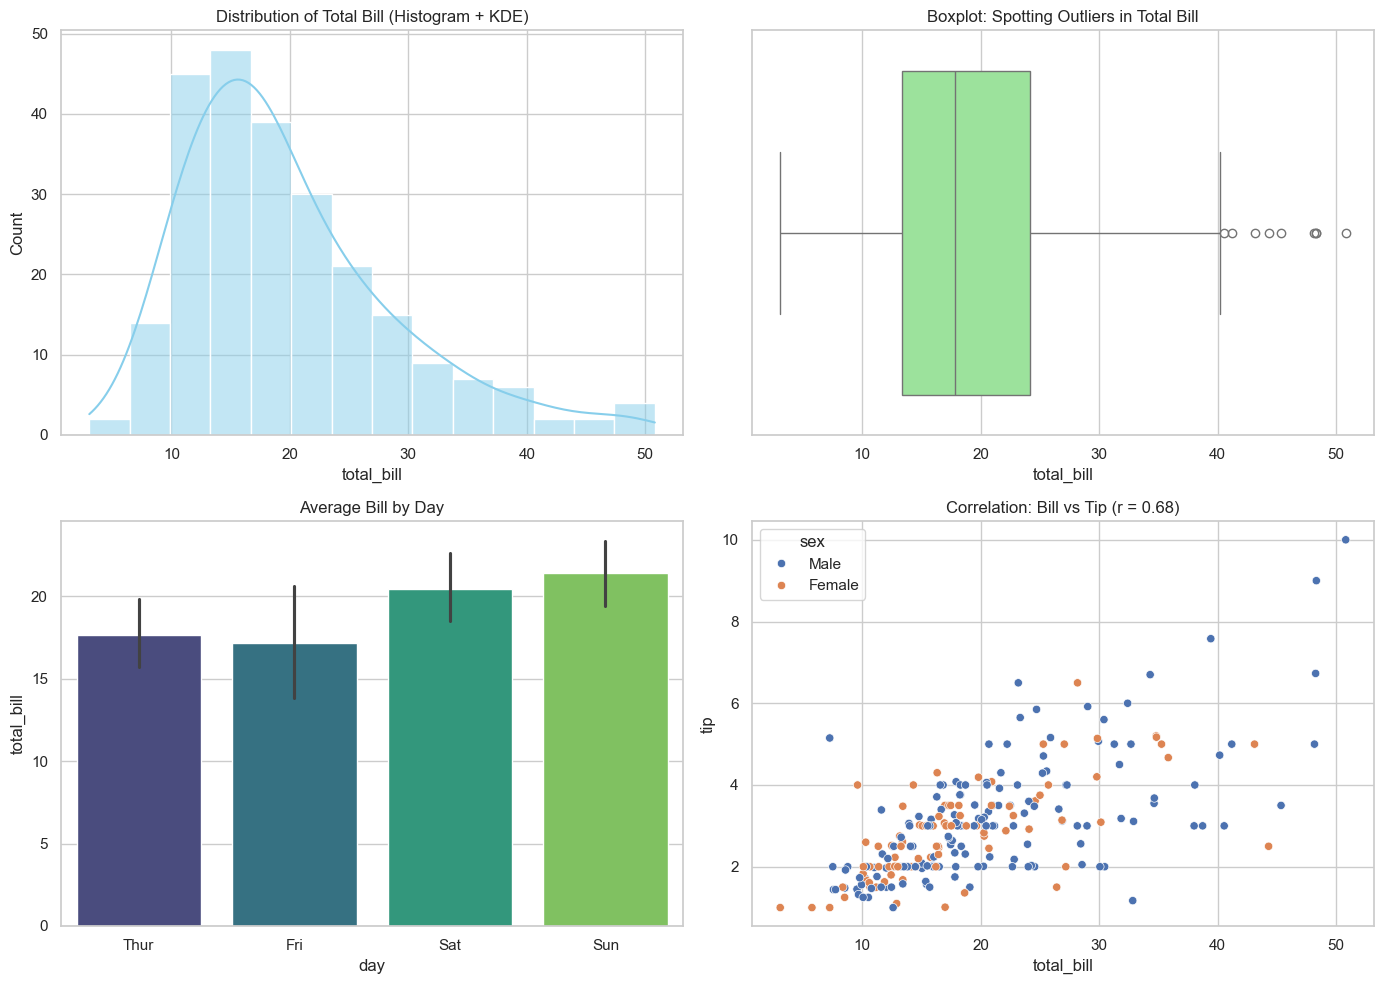

In [12]:
#some visualization
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# A. Histogram (Distribution)
sns.histplot(df['total_bill'], kde=True, color='skyblue', ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Total Bill (Histogram + KDE)')

# B. Boxplot (Outliers & Spread)
sns.boxplot(x=df['total_bill'], color='lightgreen', ax=axes[0, 1])
axes[0, 1].set_title('Boxplot: Spotting Outliers in Total Bill')

# C. Bar Plot (Categorical Comparison)
sns.barplot(x='day', y='total_bill', data=df, estimator=np.mean, palette='viridis', ax=axes[1, 0])
axes[1, 0].set_title('Average Bill by Day')

# D. Scatter Plot (Correlation: Bill vs Tip)
sns.scatterplot(x='total_bill', y='tip', hue='sex', data=df, ax=axes[1, 1])
axes[1, 1].set_title(f'Correlation: Bill vs Tip (r = {df["total_bill"].corr(df["tip"]):.2f})')

plt.tight_layout()
plt.show()

## 4. Bivariate Analysis: Correlation
Bivariate analysis explores the relationship between two variables to see if they change together.

### **Pearson Correlation Coefficient ($r$)**
A measure of the linear strength and direction between two variables.
* **Formula:** $$r = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum (x_i - \bar{x})^2 \sum (y_i - \bar{y})^2}}$$

### **Interpretation of $r$:**
* **$r = 1$:** Perfect positive correlation.
* **$r = 0$:** No linear relationship.
* **$r = -1$:** Perfect negative correlation.
* **Strength:** Generally, $|r| > 0.7$ is strong, while $|r| < 0.3$ is weak.

In [13]:
# Calculate Pearson Correlation
correlation = df['total_bill'].corr(df['tip'])

# Create Interactive Scatter Plot with Trendline
fig = px.scatter(
    df, x="total_bill", y="tip", 
    color="sex", 
    trendline="ols", # Adds a Linear Regression trendline
    title=f"Correlation between Bill and Tip (r = {correlation:.2f})",
    labels={"total_bill": "Total Bill ($)", "tip": "Tip ($)"},
    template="plotly_white"
)

fig.show()

## 5. Advanced Descriptive Metrics
To provide a deeper look at data reliability and standardization, we use the following metrics:

### **Coefficient of Variation (CV)**
The ratio of the standard deviation to the mean. It allows you to compare the degree of variation between datasets with different units or scales.
$$CV = \frac{s}{\bar{x}}$$

### **Standard Error of the Mean (SEM)**
Measures how far the sample mean of the data is likely to be from the true population mean. It decreases as the sample size ($n$) increases.
$$SEM = \frac{s}{\sqrt{n}}$$

### **Z-Score (Standardization)**
The number of standard deviations a specific data point is from the mean. This is the primary tool for identifying **Statistical Outliers**.
$$z = \frac{x - \bar{x}}{s}$$
* **Rule of Thumb:** A Z-score greater than 3 or less than -3 is typically considered an extreme outlier.

In [14]:
# 1. Calculate Advanced Metrics
mean_bill = df['total_bill'].mean()
std_bill = df['total_bill'].std()

cv = std_bill / mean_bill
sem = stats.sem(df['total_bill'])

# 2. Calculate Z-Scores for every point
df['z_score'] = (df['total_bill'] - mean_bill) / std_bill

print(f"Coefficient of Variation: {cv:.4f}")
print(f"Standard Error (SEM):     {sem:.4f}")

# 3. Visualize Z-Scores to find outliers
fig = px.scatter(
    df, x=df.index, y="z_score",
    color="z_score",
    color_continuous_scale="RdBu_r",
    title="Z-Score Analysis for Outlier Detection",
    labels={"index": "Data Point Index", "z_score": "Z-Score"}
)

# Add threshold lines at +3 and -3
fig.add_hline(y=3, line_dash="dot", line_color="red", annotation_text="Upper Outlier Threshold")
fig.add_hline(y=-3, line_dash="dot", line_color="red", annotation_text="Lower Outlier Threshold")

fig.show()

Coefficient of Variation: 0.4499
Standard Error (SEM):     0.5699


## 6. Outlier Detection via Tukey’s Fences
While Z-scores are useful for normal distributions, **Tukey’s Fences** is a robust method that does not assume a "Bell Curve." It uses the Interquartile Range (IQR) to find anomalies.

### **The Formula**
A data point is considered a "Suspected Outlier" if it falls outside these boundaries:
* **Lower Fence:** $Q1 - 1.5 \times IQR$
* **Upper Fence:** $Q3 + 1.5 \times IQR$

Points beyond $3 \times IQR$ are often classified as "Extreme Outliers."



In [16]:
# Calculate Tukey's Fences
Q1 = df['total_bill'].quantile(0.25)
Q3 = df['total_bill'].quantile(0.75)
IQR = Q3 - Q1

lower_fence = Q1 - (1.5 * IQR)
upper_fence = Q3 + (1.5 * IQR)

# Identify Outliers
outliers = df[(df['total_bill'] < lower_fence) | (df['total_bill'] > upper_fence)]
print(f"Number of outliers detected: {len(outliers)}")

# Visualize with Threshold Lines
fig = px.scatter(df, x=df.index, y="total_bill", 
                 color=(df['total_bill'] > upper_fence) | (df['total_bill'] < lower_fence),
                 color_discrete_map={True: 'red', False: 'blue'},
                 labels={"color": "Is Outlier?"},
                 title="Outlier Detection (Tukey's Fences)")

fig.add_hline(y=upper_fence, line_dash="dash", line_color="red", annotation_text="Upper Fence")
fig.add_hline(y=lower_fence, line_dash="dash", line_color="red", annotation_text="Lower Fence")
fig.show()


Number of outliers detected: 9


## 7. Percentiles and Quantiles
Percentiles indicate the relative standing of a value within the dataset.

### **Definition**
The $k^{th}$ percentile is the value below which $k$ percent of the observations fall.
* **$25^{th}$ Percentile ($Q1$):** Lower quartile.
* **$50^{th}$ Percentile ($Q2$):** Median.
* **$75^{th}$ Percentile ($Q3$):** Upper quartile.
* **$95^{th}$ or $99^{th}$:** Often used in research to define "normal" boundaries or high-performance thresholds.



In [18]:
# Calculate specific percentiles
p_values = [0.05, 0.25, 0.50, 0.75, 0.95, 0.99]
percentiles = df['total_bill'].quantile(p_values)

# Create a summary table
perc_df = pd.DataFrame({'Percentile': [f"{int(p*100)}%" for p in p_values], 'Value': percentiles.values})
display(perc_df)

# Interactive ECDF (Empirical Cumulative Distribution Function)
fig = px.ecdf(df, x="total_bill", title="Cumulative Distribution (Percentiles)",
              markers=True, lines=True)
fig.add_vline(x=percentiles[0.95], line_dash="dot", annotation_text="95th Percentile")
fig.show()


,Percentile,Value
0,5%,9.5575
1,25%,13.3475
2,50%,17.7950
3,75%,24.1275
4,95%,38.0610
5,99%,48.2270


## 8. Missing Value Analysis (Data Completeness)
In any research project, reporting missing data is mandatory for transparency and validity.

### **Why it Matters**
* **Bias:** If data is missing systematically, it can skew results.
* **Sample Size ($n$):** Missing values reduce your statistical power.



In [19]:
# Check for missing values
missing_counts = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100

missing_report = pd.DataFrame({'Missing Count': missing_counts, 'Percentage (%)': missing_percent})
print("Missing Data Report:")
display(missing_report)

# Interactive Bar Chart of Completeness
fig = px.bar(missing_report, y='Percentage (%)', 
             title="Data Completeness Analysis",
             labels={'index': 'Variable'},
             color='Percentage (%)', color_continuous_scale='Reds')
fig.update_yaxes(range=[0, 100])
fig.show()


Missing Data Report:


,Missing Count,Percentage (%)
total_bill,0,0.0
tip,0,0.0
sex,0,0.0
smoker,0,0.0
day,0,0.0
time,0,0.0
size,0,0.0
z_score,0,0.0
